In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.metrics import accuracy_score

sys.path.append("../")

from mlalgorithms.linear_models import LogisticRegression, SoftmaxRegression

In [2]:
X, y = load_breast_cancer(return_X_y=True)
print("Dimensions of X: {}, y: {}".format(X.shape, y.shape))

Dimensions of X: (569, 30), y: (569,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Dimensions of X_train: {}, X_test: {}".format(X_train.shape, X_test.shape))

Dimensions of X_train: (398, 30), X_test: (171, 30)


In [4]:
clf = LogisticRegression(penalty='None', learning_rate=1e-5, n_iters=100)
clf.fit(X_train, y_train)

In [5]:
clf.coeff_

array([ 1.19762818e-01,  1.69621952e-01,  7.00760993e-01,  2.51676555e-01,
        1.10346372e-03, -3.38081803e-04, -1.95918118e-03, -8.34187585e-04,
        2.10986347e-03,  8.76235475e-04,  3.98393984e-04,  1.15024027e-02,
       -5.51778286e-03, -3.12487475e-01,  7.28453924e-05, -4.25898263e-05,
       -1.05297719e-04,  4.18287415e-06,  1.81712415e-04,  2.24250848e-05,
        1.26562901e-01,  2.11860874e-01,  7.00837099e-01, -3.89557510e-01,
        1.36161476e-03, -1.80027432e-03, -4.05313453e-03, -8.42887257e-04,
        2.68944665e-03,  8.17926690e-04])

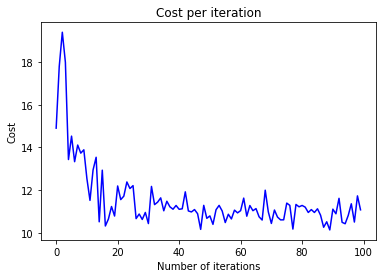

In [6]:
plt.plot(range(len(clf.costs_)), clf.costs_, 'b-')
plt.title("Cost per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [7]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8713450292397661

In [8]:
from mlalgorithms.svm import SVC

for kernel in ('linear', 'poly', 'rbf'):
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f"SVM with `{kernel}` kernel accuracy: {accuracy_score(y_test, y_pred)}")

SVM with `linear` kernel accuracy: 0.9415204678362573
SVM with `poly` kernel accuracy: 0.9473684210526315
SVM with `rbf` kernel accuracy: 0.6140350877192983


In [9]:
X, y = load_iris(return_X_y=True)
print("Dimensions of X: {}, y: {}, classes: {}".format(X.shape, y.shape, np.unique(y)))

Dimensions of X: (150, 4), y: (150,), classes: [0 1 2]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [11]:
clf = SoftmaxRegression()
clf.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [16]:
clf = LogisticRegression() # One vs All Classifier
clf.fit(X_train, y_train)

In [17]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7166666666666667

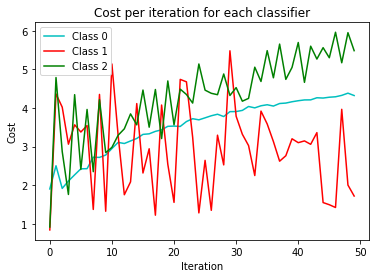

In [18]:
colors = {
    0: 'c',
    1: 'r',
    2: 'g'
}

for c in np.unique(y):
    plt.plot(range(50), clf.costs_[c,:], colors[c], label=f'Class {c}')

plt.title("Cost per iteration for each classifier")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(loc='best')
plt.show()